In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time
from cuqi.model import LinearModel
import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
from cuqi.distribution import Distribution, JointDistribution, UserDefinedDistribution

# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))
import math
from utilities import TableAutomization as TA
import benchmarksClass as BC 


In [2]:
# The donut distribution 
# target_donut = BM.
target_mm = BC.SimplestBip()
print(target_mm)

CUQI SimplestBip.


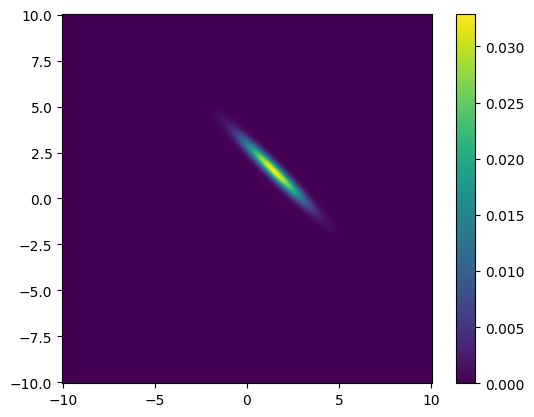

In [3]:
TA.plot_pdf_2D(target_mm, -10, 10, -10, 10,N2=201)

In [6]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)
BP = BayesianProblem(b, x)

specific =  np.array([1.5,1.5 ])
b_ob = b(x = specific).sample()
BP.set_data(b=b_ob)

BayesianProblem with target: 
 Posterior(
    Equation:
	 p(x|b) ∝ L(x|b)p(x)
    Densities:
	b ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )

In [9]:
target = UserDefinedDistribution(dim = 2, logpdf_func = BP.posterior.logpdf, gradient_func = BP.posterior.gradient)

In [5]:
x = Gaussian(np.zeros(2), 2.5)
A_matrix = np.array([[1.0, 1.0]])
A = LinearModel(A_matrix)
b= Gaussian(A@x, 0.1)
b

CUQI Gaussian. Conditioning variables ['x'].

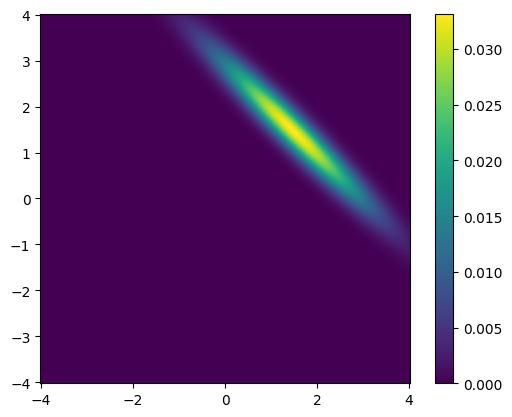

In [3]:
TA.plot_pdf_2D(target_mm, -4, 4, -4, 4)

In [4]:
df, (fig, axs)  = TA.create_comparison(
    target_donut, 
    [0.05, 0.05, 0.065, 0.065, 0.05 ], 
    [100, 85, 100, 100, 100], 
    [0, 15, 0, 50, 10], 
    x0 = np.array([1, 1]),
    seed=12, 
    chains = 2
)


Sample 100 / 100

Average acceptance rate: 0.77 

Sample 100 / 100

Average acceptance rate all components: 0.7 

Sample 100 / 100
Sample 150 / 150
Sample 110 / 110
